## Protocolo Centralizado

In [1]:
from quantumnet.components import Network, Host, Controller
from quantumnet.objects import Qubit, Logger
from random import randint

ImportError: cannot import name 'Controller' from 'quantumnet.components' (c:\Users\Tavares\Desktop\codigo oficial\QuantumNetOfficial\quantumnet\components\__init__.py)

## A rede é iniciada. <br>

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


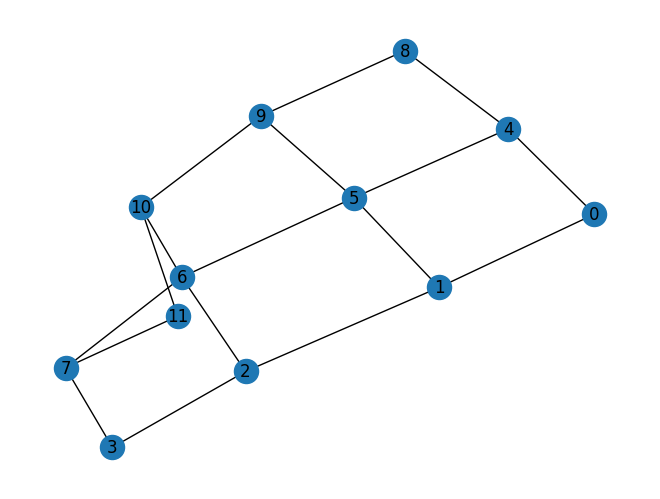

In [2]:
rede = Network()
controlador = Controller(rede)
rede.set_ready_topology("Grade", 3, 4)
rede.draw()

Cada Nó da rede envia ao controlador as suas informações : ID, Canais conectados, Numqubits, etc.<br>
Mensagem de Registro.

In [3]:
for host_id in rede.hosts:
    print(rede.get_host(host_id).info())

{'host_id': 0, 'memory': 10, 'routing_table': {0: [0]}}
{'host_id': 1, 'memory': 10, 'routing_table': {1: [1]}}
{'host_id': 2, 'memory': 10, 'routing_table': {2: [2]}}
{'host_id': 3, 'memory': 10, 'routing_table': {3: [3]}}
{'host_id': 4, 'memory': 10, 'routing_table': {4: [4]}}
{'host_id': 5, 'memory': 10, 'routing_table': {5: [5]}}
{'host_id': 6, 'memory': 10, 'routing_table': {6: [6]}}
{'host_id': 7, 'memory': 10, 'routing_table': {7: [7]}}
{'host_id': 8, 'memory': 10, 'routing_table': {8: [8]}}
{'host_id': 9, 'memory': 10, 'routing_table': {9: [9]}}
{'host_id': 10, 'memory': 10, 'routing_table': {10: [10]}}
{'host_id': 11, 'memory': 10, 'routing_table': {11: [11]}}


Controlador Cria a Tabela de Repasse de todos os nós, com base das informações.

In [4]:
controlador.register_routing_tables()

for host_id in rede.hosts:
    print(rede.get_host(host_id).info()['routing_table'])

{0: [0], 4: [0, 4], 1: [0, 1], 8: [0, 4, 8], 5: [0, 4, 5], 2: [0, 1, 2], 9: [0, 4, 8, 9], 6: [0, 4, 5, 6], 3: [0, 1, 2, 3], 10: [0, 4, 8, 9, 10], 7: [0, 4, 5, 6, 7], 11: [0, 4, 8, 9, 10, 11]}
{1: [1], 0: [1, 0], 5: [1, 5], 2: [1, 2], 4: [1, 0, 4], 9: [1, 5, 9], 6: [1, 5, 6], 3: [1, 2, 3], 8: [1, 0, 4, 8], 10: [1, 5, 9, 10], 7: [1, 5, 6, 7], 11: [1, 5, 9, 10, 11]}
{2: [2], 1: [2, 1], 6: [2, 6], 3: [2, 3], 0: [2, 1, 0], 5: [2, 1, 5], 10: [2, 6, 10], 7: [2, 6, 7], 4: [2, 1, 0, 4], 9: [2, 1, 5, 9], 11: [2, 6, 10, 11], 8: [2, 1, 0, 4, 8]}
{3: [3], 2: [3, 2], 7: [3, 7], 1: [3, 2, 1], 6: [3, 2, 6], 11: [3, 7, 11], 0: [3, 2, 1, 0], 5: [3, 2, 1, 5], 10: [3, 2, 6, 10], 4: [3, 2, 1, 0, 4], 9: [3, 2, 1, 5, 9], 8: [3, 2, 1, 0, 4, 8]}
{4: [4], 0: [4, 0], 8: [4, 8], 5: [4, 5], 1: [4, 0, 1], 9: [4, 8, 9], 6: [4, 5, 6], 2: [4, 0, 1, 2], 10: [4, 8, 9, 10], 7: [4, 5, 6, 7], 3: [4, 0, 1, 2, 3], 11: [4, 8, 9, 10, 11]}
{5: [5], 1: [5, 1], 4: [5, 4], 9: [5, 9], 6: [5, 6], 0: [5, 1, 0], 2: [5, 1, 2], 8: [5, 4

## Requisição

- Alice: indica que vai enviar para bob pela rota padrão ao controlador
- Controlador: confirma e (ou reescreve) a rota para alice
- Controlador: aloca a rota para impedir que outros utilizem 
- Controlador: avisa bob, e rota (n), e sincroniza as ações a serem realizadas.
- Bob e Rota: confirmam ao controlador 
- Controlador: avisa alice, bob e rota que todos estão prontos
- Alice: inicia o processo → Varia com PUR, ESWAP, QKD/qAPP 
- A cada passo é enviado confirmações a nível de camada N (física, enlace, rede, transporte) 
- A cada Qubit enviado é dado a confirmação de alice e bob 
- Na última confirmação de Qubit alice, envia também ao controlador (para liberar a rota)

In [5]:
# Seleciona dois hosts aleatórios
random_alice = randint(0, len(rede.hosts)-1)
random_bob = randint(0, len(rede.hosts)-1)
route = rede.get_host(random_alice).routing_table[random_bob]

print(f"Alice: {random_alice} deseja se comunicar com Bob: {random_bob} pela rota {route}")
print(f"Controlador confirmando rota. Resultado: {controlador.check_route(route)}")
print(f"Controlador notifica Bob e os demais nós da rota:")

controlador.announce_to_route_nodes(route)

print(f"Bob e os demais nós da rota confirmam recebimento da mensagem")
print(f"Controlador avisa Alice e Bob que a rota está pronta: ")

controlador.announce_to_alice_and_bob(route)

Alice: 4 deseja se comunicar com Bob: 10 pela rota [4, 8, 9, 10]
Controlador confirmando rota. Resultado: True
Controlador notifica Bob e os demais nós da rota:
Nó 8 informado.
Nó 9 informado.
Nó 10 informado.
Bob e os demais nós da rota confirmam recebimento da mensagem
Controlador avisa Alice e Bob que a rota está pronta: 
Alice 4 e Bob 10 informados.


Alice realiza o protocolo QKD E91 com Bob, enviando 10 qubits

In [6]:
rede.application_layer.qkd_e91_protocol(random_alice, random_bob, 10)
print(f"Alice avisa ao controlador que a chave foi gerada. A rota pode ser liberada.")
rede.get_host(random_alice).announce_to_controller_app_has_finished()

Alice avisa ao controlador que a chave foi gerada. A rota pode ser liberada.
Host 4 informou ao controlador que a aplicação terminou.
